<a href="https://colab.research.google.com/github/ashleighr01/MLA_AMR/blob/main/FinalProject_Regression_AMR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning Final Project: Regression**

*Ashleigh Rufus*

#*Import Specific Models*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

In [5]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [6]:
from sklearn import set_config
set_config(display='diagram')

#*Acquire Data*

In [7]:
mathdf = pd.read_csv('/content/gdrive/MyDrive/CS430/student-mat.csv', sep=';')


In [8]:
mathdf.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#*Statistical & Visual Exploration*

In [9]:
mathdf.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [10]:
mathFinal = mathdf.G3.groupby(mathdf.G3).count()

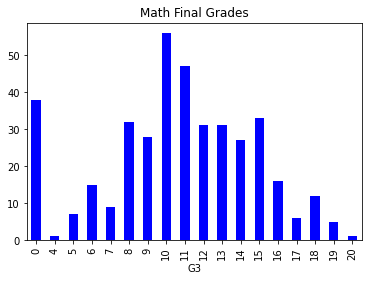

In [11]:
mathFinal.plot(kind='bar', title='Math Final Grades', color='blue')

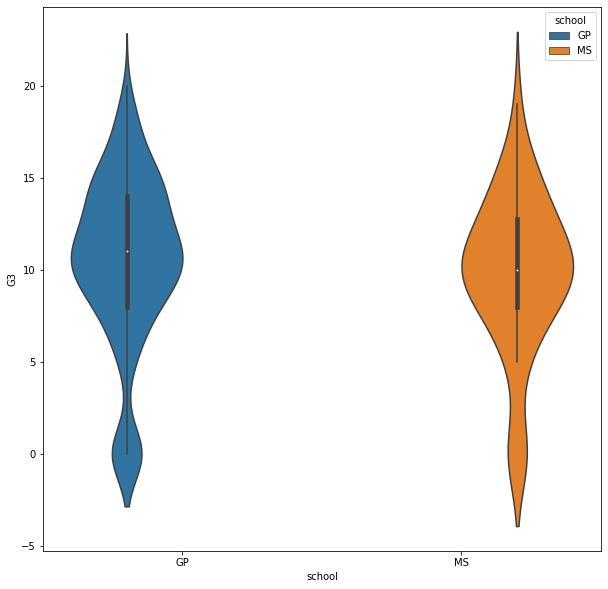

In [12]:
fig = plt.figure(figsize=(10,10))
sns.violinplot(x='school', y='G3', data=mathdf, hue='school')

#*Splitting Data into Train/Test*

In [13]:
X = mathdf.iloc[:,0:-1]
y = mathdf[['G3']]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=32)

#*Building the Pipeline(s)*

In [15]:
mathdf.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [16]:
num_attribs = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
cat_attribs = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

In [17]:
col_transform = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

*Linear Regression*

In [18]:
linear = Pipeline([
    ('transform', col_transform),
    ('linearReg', LinearRegression()),
])

*Support Vector Machine*

In [19]:
svm = Pipeline([
    ('transform', col_transform),
    ('svr', SVR()),
])

*GridSearchCV*

In [20]:
parameters = {
    'svr__kernel': ['poly', 'linear', 'rbf'],
    'svr__degree': [2, 3, 5],
    'svr__C': [25, 50, 100],
    'svr__epsilon': [0.0, 0.1, 0.2]
}


In [21]:
grid_pipeline = GridSearchCV(svm, param_grid=parameters)

#*Execute the Models*

*Linear Regression*

In [22]:
linear.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health', 'absences',
                                                   'G1', 'G2']),
                                                 ('cat', OneHotEncoder(),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Mjob',
                                                   'Fjob', 'reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic'])])),
                ('linearReg', LinearRegression())])

*Support Vector Machine*

In [23]:
svm.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health', 'absences',
                                                   'G1', 'G2']),
                                                 ('cat', OneHotEncoder(),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Mjob',
                                                   'Fjob', 'reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic'])])),
                ('svr', SVR())])

*GridSearchCV*

In [24]:
grid_pipeline.fit(X_train, np.ravel(y_train))

GridSearchCV(estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['age',
                                                                          'Medu',
                                                                          'Fedu',
                                                                          'traveltime',
                                                                          'studytime',
                                                                          'failures',
                                                                          'famrel',
                                                                          'freetime',
                                                                          'goout',
                                                                          'Dalc',
                                                                          'Walc',
                                                                          'health',
                                                                          'absences',
                                                                          'G1',
                                                                          'G2']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['school',
                                                                          'sex',
                                                                          'address',
                                                                          'famsize',
                                                                          'Pstatus',
                                                                          'Mjob',
                                                                          'Fjob',
                                                                          'reason',
                                                                          'guardian',
                                                                          'schoolsup',
                                                                          'famsup',
                                                                          'paid',
                                                                          'activities',
                                                                          'nursery',
                                                                          'higher',
                                                                          'internet',
                                                                          'romantic'])])),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [25, 50, 100], 'svr__degree': [2, 3, 5],
                         'svr__epsilon': [0.0, 0.1, 0.2],
                         'svr__kernel': ['poly', 'linear', 'rbf']})

#*Evaluate the Models*

*Linear Regression*

In [25]:
y_testpred_lr = linear.predict(X_test)
y_trainpred_lr = linear.predict(X_train)

In [26]:
print("Root mean squared error for test: ", (mean_squared_error(y_test, y_testpred_lr)**(0.5)))
print("Root mean squared error for train: ", (mean_squared_error(y_train, y_trainpred_lr)**(0.5)))

Root mean squared error for test:  2.2125013382945897
Root mean squared error for train:  1.7261514242612557


*Support Vector Machine*

In [27]:
y_testpred_svm = svm.predict(X_test)
y_trainpred_svm = svm.predict(X_train)

In [28]:
print("Root mean squared error for test: ", (mean_squared_error(y_test, y_testpred_svm)**(0.5)))
print("Root mean squared error for train: ", (mean_squared_error(y_train, y_trainpred_svm)**(0.5)))

Root mean squared error for test:  3.73256561694301
Root mean squared error for train:  3.460119776139946


*GridSearchCV*

In [29]:
grid_pipeline.best_params_

{'svr__C': 50, 'svr__degree': 2, 'svr__epsilon': 0.1, 'svr__kernel': 'linear'}

In [30]:
grid_pipeline.score(X_test, np.ravel(y_test))

0.7772701990841645

**Evalution Result**

Linear Regression appears to be the better model for predicting the final grade for the math students in this dataset. However, when looking at the models on their own, the Support Vector Machine has RMSE values very close within range of one another (0.3 difference). While the Linear Regression had a range around 0.5.

#**Conclusion**

Both models do appear to give an accurate prediction for the math students' final grades. The differences between test and train sets are less than 1.0. Another note is that the accuracy score with SVR through the GridSearchCV piepline is around 0.77, not bad but definitely gives room for improvement.